## ARIMA Model

ADF Statistic: 0.8448222456061115
p-value: 0.9923262912820229
→ Data is non-stationary.
Performing stepwise search to minimize aic


c:\Users\bollejayanthsriteja\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\bollejayanthsriteja\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\bollejayanthsriteja\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\bollejayanthsriteja\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\bollejayanthsriteja\App

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10432.429, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10430.530, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10432.046, Time=0.10 sec


c:\Users\bollejayanthsriteja\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\bollejayanthsriteja\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\bollejayanthsriteja\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10432.017, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10434.072, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.765 seconds

 Best ARIMA model:                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2515
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -5213.265
Date:                Wed, 06 Aug 2025   AIC                          10430.530
Time:                        22:02:02   BIC                          10442.189
Sample:                             0   HQIC                         10434.761
                               - 2515                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------

c:\Users\bollejayanthsriteja\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\bollejayanthsriteja\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\bollejayanthsriteja\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\bollejayanthsriteja\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been pr

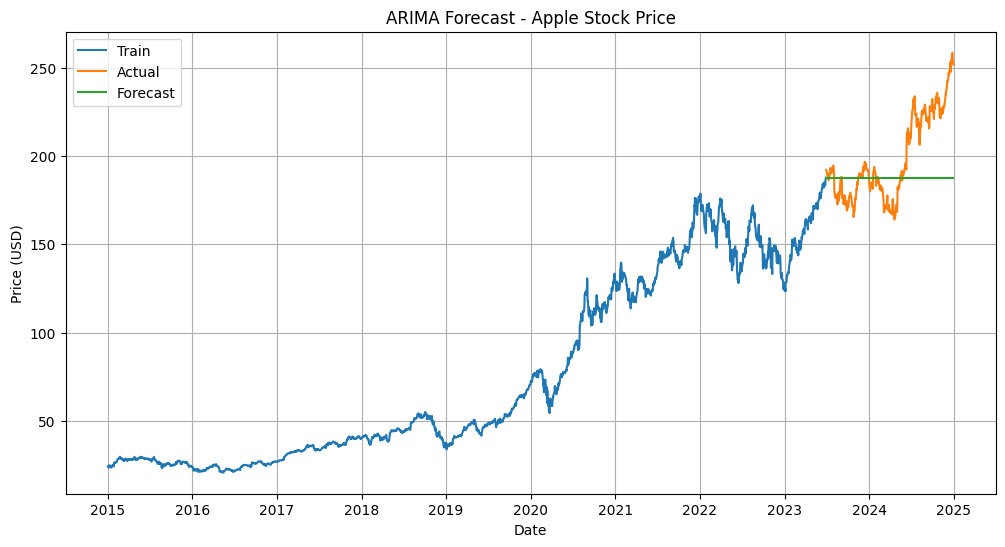

 RMSE: 26.26
 MAE : 20.02
✔ ARIMA predictions saved to 'Models/arima_predictions.csv'


In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import os

# Step 1: Load CSV
df = pd.read_csv(r"C:\Users\bollejayanthsriteja\OneDrive\Desktop\Time Series Analysis and Forecasting for Stock Market\AAPL_clean.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Step 2: Ensure 'Close' is numeric
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df = df.dropna(subset=['Close'])  

# Step 3: ADF Test for Stationarity
data = df['Close']
result = adfuller(data)
print("ADF Statistic:", result[0])
print("p-value:", result[1])
if result[1] > 0.05:
    print("→ Data is non-stationary.")
else:
    print("→ Data is stationary.")

# Step 4: Auto ARIMA to find best (p,d,q)
stepwise_model = auto_arima(data, start_p=1, start_q=1,
                            max_p=5, max_q=5,
                            seasonal=False, trace=True,
                            error_action='ignore', suppress_warnings=True,
                            stepwise=True)
print("\n Best ARIMA model:", stepwise_model.summary())

# Step 5: Train-test split
train_size = int(len(data) * 0.85)
train, test = data[:train_size], data[train_size:]

# Step 6: Fit ARIMA model
model = ARIMA(train, order=stepwise_model.order)
model_fit = model.fit()

# Step 7: Forecast
forecast = model_fit.forecast(steps=len(test))
forecast.index = test.index

# Step 8: Plot results
plt.figure(figsize=(12, 6))
plt.plot(train, label="Train")
plt.plot(test, label="Actual")
plt.plot(forecast, label="Forecast")
plt.title("ARIMA Forecast - Apple Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

# Step 9: Evaluation
rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)
print(f" RMSE: {rmse:.2f}")
print(f" MAE : {mae:.2f}")

# Step 10: Save predictions to CSV (for final comparison)
os.makedirs("Models", exist_ok=True)

arima_output = pd.DataFrame({
    'Date': forecast.index,
    'Actual': test.values,
    'Forecast': forecast.values
})
arima_output.to_csv("Models/arima_predictions.csv", index=False)
print("ARIMA predictions saved to 'Models/arima_predictions.csv'")
